In [ ]:
!pip install contractions

In [ ]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 366.8 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import Word
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thesakshipandey/nltk_data...


True

In [ ]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='1.1'></a>
# Load and Inspect Dataset

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


In [ ]:
data = pd.read_csv('Dataset_English_Hindi.csv')

In [ ]:
data.sample(5)

,English,Hindi
97059,"On the other hand , it must be remembered that...","दूसरी ओर , यह भी ध्यान रखना चाहिए कि लोग अपने ..."
47657,Category: Independence fighter,श्रेणी:स्वतंत्रता सेनानी
58785,Jaipur is the capital of the state,जयपुर राज्य की राजधानी है।
71776,People here have a natural predilection for th...,इन तमाशों में प्रति समूचे लोक का प्राकृतिक झुक...
90928,Mumbai is the capital of Indian state Maharash...,भारत के पश्चिमी तट पर स्थित मुम्बई (पूर्व नाम ...


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='3'></a>
# 3 | Data Exploration

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='3.1'></a>
#### 3.1. Computing Dimension of Dataset

In [ ]:
print("dataset shape: ",data.shape)

dataset shape:  (130476, 2)


<a id='3.2'></a>
#### 3.2. Statistical Summary of Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130476 entries, 0 to 130475
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  130474 non-null  object
 1   Hindi    130164 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


<a id='3.3'></a>
#### 3.3. Checking if There's Any Duplicate Records.

In [ ]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  2788


<a id='3.4'></a>
#### 3.4. Computing Total No. of Missing Values and the Percentage of Missing Values

In [ ]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
English,2,0.00
Hindi,312,0.24


<a id='3.5'></a>
#### 3.5. Performing Descriptive Analysis

In [ ]:
round(data.describe().T,2)

,count,unique,top,freq
English,130474,126959,(Laughter),555
Hindi,130164,100228,(हँसी),212


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='4'></a>
# 4 | Preprocessing

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='4.1'></a>
### **1. Dropping Duplicates and Null Values**

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.dropna(inplace = True)

<a id='4.2'></a>
### **2. Lowercasing**

In [ ]:
data['English'] = data['English'].str.lower()

<a id='4.3'></a>
### **3. Removing Html tags**

In [ ]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [ ]:
data['English'] = data['English'].apply(remove_html_tags)

<a id='4.4'></a>
### **4.  Removing URLs**

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

data['English'] = data['English'].apply(remove_url)
data['Hindi'] = data['Hindi'].apply(remove_url)

<a id='4.5'></a>
### **5. Chat word treatment**

In [ ]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

In [ ]:
def chat_conversion(text):
    new_text=[]
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
data['English'] = data['English'].apply(chat_conversion)

<a id='4.6'></a>
### **6. Removing Emojis**

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
data['English'] = data['English'].apply(remove_emoji)
data['Hindi'] = data['Hindi'].apply(remove_emoji)

<a id='4.7'></a>
### **7. Removing contraction**

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['English'] = data['English'].apply(expand_contractions)

<a id='4.8'></a>
### **8. Remove Non-Hindi and Alphanumeric characters**

In [ ]:
def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text

    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")

data['English'] = data['English'].apply(lambda x: preprocess_text(x, language='english'))
data['Hindi'] = data['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

In [ ]:
data.sample(5)

,English,Hindi
97979,the plantation and the factory constituted one...,बागान और फैक़्ट्री की एक ही प्रबंध समिति थी यद...
50180,himalayas has more than 100 mountains which ex...,हिमालय में १०० से ज्यादा पहाड हैं जॊ ७२०० मीटर...
65679,whereas the chickens are actually mature,जबकि मुर्गे बडे हो जाते हैं
34697,they do almost all of the skillbased routine t...,वो सारे के सारे कौशलआधारित नित्य कर्म करने में...
25495,the consciousness in a dream is essentially a ...,स्वप्न में चेतना आवश्यक रूप से एक बदलने वाली अ...


<a id='4.9'></a>
### **9. WordCloud**

In [ ]:
# Function to preprocess text and generate word cloud
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))

    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

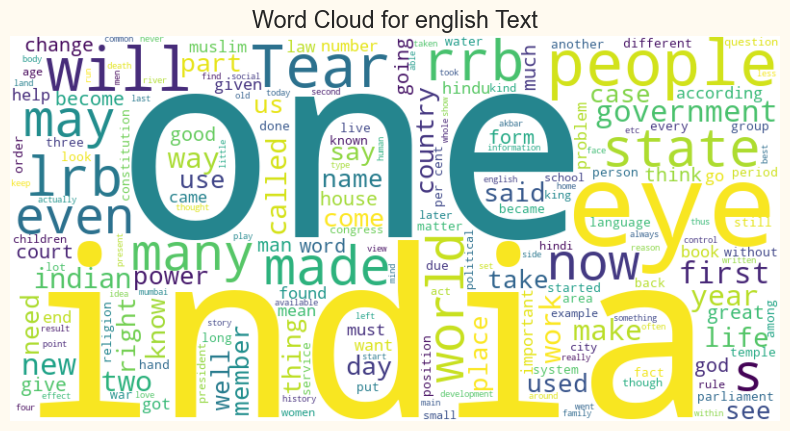

In [ ]:
# Generate word clouds for English and Hindi columns
generate_wordcloud(data['English'], 'english')

In [ ]:
data.shape

(127375, 2)

In [ ]:
data = data[data['English'].str.len() <= 50]

In [ ]:
data.shape

(50157, 2)

In [ ]:
# Add <start> and <end> tokens to Hindi sentences
data['Hindi'] = ['<start> ' + sentence + ' <end>' for sentence in data['Hindi']]

<a id='4.10'></a>
### **10. Tokenize on the Data**

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(data['English'])

In [ ]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Hindi'])

In [ ]:
len(tok.word_index),len(tok_hindi.word_index)

(22870, 24779)

In [ ]:
len(tok.word_index),len(tok_hindi.word_index)

(22870, 24779)

In [ ]:
tok.document_count

50157

#### **Converting data in numerical forms**

In [ ]:
data['English'] = tok.texts_to_sequences(data['English'])
data['Hindi'] = tok_hindi.texts_to_sequences(data['Hindi'])

In [ ]:
data

,English,Hindi
0,[148],"[1, 13034, 2]"
1,[2853],"[1, 13035, 2]"
2,[2853],"[1, 13036, 2]"
3,[2853],"[1, 4577, 2]"
4,[3819],"[1, 9695, 2]"
...,...,...
130461,"[62, 52, 9, 14, 6, 964, 157]","[1, 99, 49, 21, 11, 1833, 164, 9, 2]"
130462,"[1, 22869, 14, 10094, 27, 4615]","[1, 107, 2948, 9445, 17, 3284, 8, 3267, 45, 52..."
130464,"[5, 48, 13, 95, 10, 4, 253, 56, 459]","[1, 84, 22, 180, 9, 14, 13, 1285, 840, 2]"
130466,"[364, 46, 16, 212, 345]","[1, 1123, 36, 34, 1341, 15, 7, 16, 2]"


In [ ]:
def calculate_max_sequence_length(eng,hindi):
    max_length_combined = max(max(len(seq) for seq in eng), max(len(seq) for seq in hindi))

    return max_length_combined

max_length_combined = calculate_max_sequence_length(data['English'],data['Hindi'])
max_length_combined

260

In [ ]:
for num in data['English'][0]:
    print(num, end=' ')

148 

In [ ]:
# Print corresponding words horizontally
for num in data['English'][0]:
    word = tok.index_word.get(num, 'UNK')
    print(word, end=' ')

help 

In [ ]:
for num in data['Hindi'][0]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")

start बचाओ end 

<a id='4.11'></a>
### **11. separating the data in dependent and independent**

In [ ]:
hindi = data['Hindi']
english = data['English']

<a id='4.12'></a>
### **12. Padding**

In [ ]:
x = pad_sequences(english,maxlen = max_length_combined,padding = 'post')
y = pad_sequences(hindi,maxlen = max_length_combined,padding = 'post')

In [ ]:
x

array([[ 148,    0,    0, ...,    0,    0,    0],
       [2853,    0,    0, ...,    0,    0,    0],
       [2853,    0,    0, ...,    0,    0,    0],
       ...,
       [   5,   48,   13, ...,    0,    0,    0],
       [ 364,   46,   16, ...,    0,    0,    0],
       [   2,  189,   12, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y

array([[    1, 13034,     2, ...,     0,     0,     0],
       [    1, 13035,     2, ...,     0,     0,     0],
       [    1, 13036,     2, ...,     0,     0,     0],
       ...,
       [    1,    84,    22, ...,     0,     0,     0],
       [    1,  1123,    36, ...,     0,     0,     0],
       [    1,     6,    41, ...,     0,     0,     0]], dtype=int32)

<a id='4.13'></a>
### **13. splitting in train test and val**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Check the shape of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (40125, 260)
Shape of x_test: (10032, 260)
Shape of y_train: (40125, 260)
Shape of y_test: (10032, 260)


<center><div style='color:#ffffff;
           display:inline-block;
           padding: 5px 5px 5px 5px;
           border-radius:5px;
           background-color:#78D1E1;
           font-size:100%;'><a href=#toc style='text-decoration: none; color:#03001C;'>⬆️ Back To Top</a></div></center>

<a id='5'></a>
# 5 | Modelling

<div style="padding: 4px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://i.postimg.cc/fTDmwnkQ/Miaka.png); background-size: 100% auto;"></div>


<a id='5.1'></a>
### **5.1. ENCODER-DECODER MODEL**

In [ ]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok_hindi.word_index) + 1

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 260, 260)  │  5,946,460 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 260, 260)  │  6,442,800 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 156),     │    260,208 │ embedding[0][0]   │
│                     │ (None, 156),      │            │                   │
│                     │ (None, 156)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_1[0][0… │
│                     │ 156), (None,      │            │ lstm[0][1],       │
│                     │ 156), (None,      │            │ lstm[0][2]        │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 260,       │  3,890,460 │ lstm_1[0][0]      │
│                     │ 24780)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,800,136 (64.09 MB)

 Trainable params: 16,800,136 (64.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 1495s 1s/step - accuracy: 0.9656 - loss: 0.9089 - val_accuracy: 0.9830 - val_loss: 0.1360
Epoch 2/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 1494s 1s/step - accuracy: 0.9850 - loss: 0.1234 - val_accuracy: 0.9895 - val_loss: 0.0918
Epoch 3/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 1477s 1s/step - accuracy: 0.9904 - loss: 0.0835 - val_accuracy: 0.9929 - val_loss: 0.0658
Epoch 4/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 1615s 1s/step - accuracy: 0.9935 - loss: 0.0584 - val_accuracy: 0.9949 - val_loss: 0.0492
Epoch 5/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 1470s 1s/step - accuracy: 0.9952 - loss: 0.0426 - val_accuracy: 0.9961 - val_loss: 0.0385


<a id='5.2'></a>
### **5.2. ENCODER-DECODER MODEL EVALUATION**

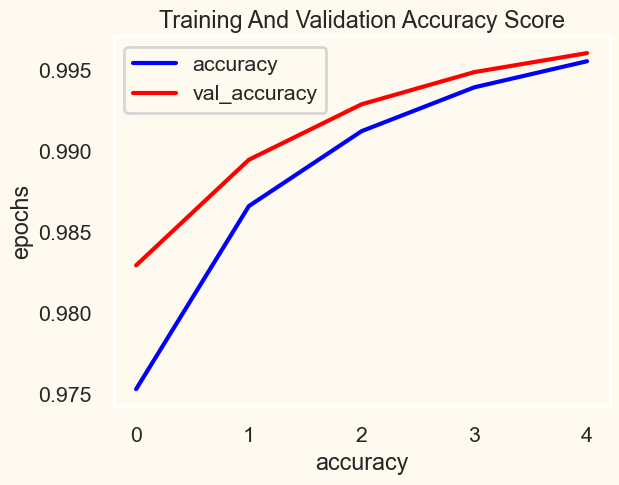

In [ ]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

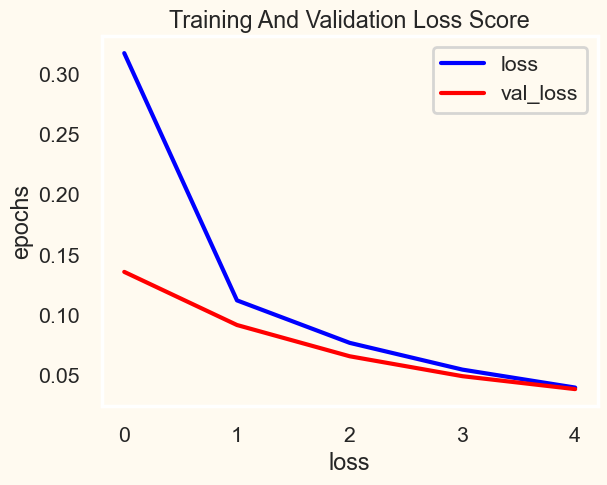

In [ ]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

<a id='5.3'></a>
### **5.3. PREDICTION FROM ENCODER-DECODER MODEL**

In [ ]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Shape of predictions: (10, 260, 24780)
Shape of predicted_tokens: (10, 260)
English sentence 1: sanskrit is the mother of all indian languages
Predicted Hindi translation 1: संस्कृत सभी भारतीय भाषाओं की माता है।

English sentence 2: so essentially it knows where to go
Predicted Hindi translation 2: तो अनिवार्य रूप से यह जानता है कहाँ जाना है

English sentence 3: i lost my best friend to a car accident
Predicted Hindi translation 3: तब मैंने अपने सबसे अच्छे मित्र को सड़क दुर्घटना में खो दिया

English sentence 4: clinics are listed in telephone directories
Predicted Hindi translation 4: इन की सूची के में मिल जाएगी

English sentence 5: i do not think in language
Predicted Hindi translation 5: मै भाषा मे नही सोचती

English sentence 6: and some of the stuff you saw there
Predicted Hindi translation 6: और उसका एक हिस्सा आपने अभी देखा।

English sentence 7: 10 in a row you move on
Predicted Hindi translation 7: जब सवाल सही हो जाये आगे

English sentence 8:

<a id='5.4'></a>
### **5.4. ENCODER-DECODER MODEL WITH ATTENTION**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_sequences=True, return_state=True)  # Ensure return_sequences=True
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 260, 260)  │  5,946,460 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 260, 260)  │  6,442,800 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_2[0][0] │
│                     │ 156), (None,      │            │                   │
│                     │ 156), (None,      │            │                   │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_3[0][0… │
│                     │ 156), (None,      │            │ lstm_2[0][1],     │
│                     │ 156), (None,      │            │ lstm_2[0][2]      │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 260, 156)  │          0 │ lstm_3[0][0],     │
│ (Attention)         │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 260, 312)  │          0 │ lstm_3[0][0],     │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 260,       │  7,756,140 │ concatenate[0][0] │
│                     │ 24780)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,665,816 (78.83 MB)

 Trainable params: 20,665,816 (78.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 1993s 2s/step - accuracy: 0.9689 - loss: 0.6401 - val_accuracy: 0.9863 - val_loss: 0.1170
Epoch 2/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 1978s 2s/step - accuracy: 0.9881 - loss: 0.1023 - val_accuracy: 0.9921 - val_loss: 0.0731
Epoch 3/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 74670s 60s/step - accuracy: 0.9929 - loss: 0.0634 - val_accuracy: 0.9948 - val_loss: 0.0500
Epoch 4/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 2208s 2s/step - accuracy: 0.9955 - loss: 0.0404 - val_accuracy: 0.9963 - val_loss: 0.0370
Epoch 5/5
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 2599s 2s/step - accuracy: 0.9970 - loss: 0.0263 - val_accuracy: 0.9972 - val_loss: 0.0287


<a id='5.5'></a>
### **5.5. ENCODER-DECODER MODEL WITH ATTENTION EVALUATION**

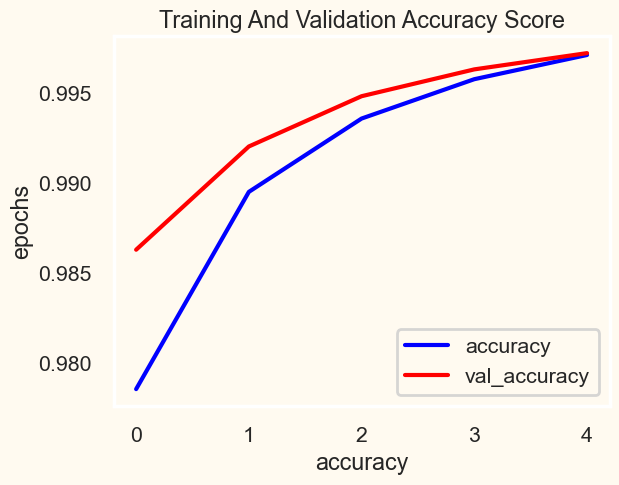

In [ ]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

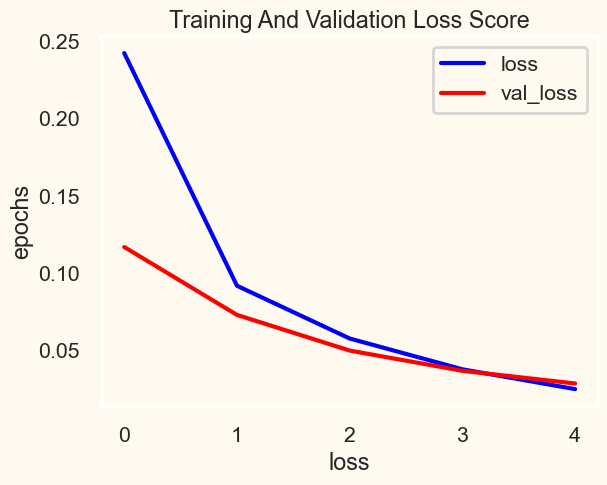

In [ ]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

<a id='5.6'></a>
### **5.6. PREDICTION FROM ENCODER-DECODER MODEL WITH ATTENTION**

In [ ]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
Shape of predictions: (10, 260, 24780)
Shape of predicted_tokens: (10, 260)
English sentence 1: sanskrit is the mother of all indian languages
Predicted Hindi translation 1: संस्कृत सभी भारतीय भाषाओं की माता है।

English sentence 2: so essentially it knows where to go
Predicted Hindi translation 2: तो अनिवार्य रूप से यह जानता है कहाँ जाना है

English sentence 3: i lost my best friend to a car accident
Predicted Hindi translation 3: तब मैंने अपने सबसे अच्छे मित्र को सड़क दुर्घटना में खो दिया

English sentence 4: clinics are listed in telephone directories
Predicted Hindi translation 4: इन की सूची शूटिंग में मिल जाएगी

English sentence 5: i do not think in language
Predicted Hindi translation 5: मै भाषा मे नही सोचती

English sentence 6: and some of the stuff you saw there
Predicted Hindi translation 6: और उसका एक हिस्सा आपने अभी देखा।

English sentence 7: 10 in a row you move on
Predicted Hindi translation 7: जब सवाल सही हो जाये आगे

English sentenc

<a id='5.7'></a>
### **5.7. Saving the best weight**

In [ ]:
# Save the entire model
model.save('encoder_decoder_model.h5')
print('Model saved succesfully!!')

Model saved succesfully!!
